# Inteligentná analýza údajov - časť Strojové učenie
## Dataset 82
#### Martin Budinský, Ivana Baleková <br/>
Podiel práce každého z dvojice: 50%

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer

#### Nastavenie pandas

Podobne ako v predchádzajúcich častiach projektu si nastavíme pandas tak, aby zobrazoval všetky stĺpce datasetu a celé hodnoty atribútov.

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 1000000)

#### Načítanie datasetov

In [5]:
personal_train_data = pd.read_csv('datasets/personal_train.csv', index_col=0)
personal_train_data.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05


In [6]:
other_train_data = pd.read_csv('datasets/other_train.csv', index_col=0)
other_train_data.head()

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Edward Woodard,"9976 Perez Trail Apt. 273\r\nDavidport, NC 80553",Black,Never-married,Other_service,f,9.0,Not-in-family,-0.231075,134.6640625,0.0,0.002102,HS-grad,180283.0,0.0,49.792111,<=50K,"{'mean_oxygen':'6.162207358','std_oxygen':'27.43869012','kurtosis_oxygen':'5.1160153180000005','skewness_oxygen':'28.79016775'}",United-States,40.0,0.0,State-gov
1,Hassan Friedman,"7145 Aaron Village Apt. 294\r\nRoweville, DE 73399",White,Married-civ-spouse,Exec-managerial,f,10.0,Husband,0.540982,113.0625,0.0,0.231768,Some-college,195891.0,0.0,42.812226,<=50K,"{'mean_oxygen':'1.731605351','std_oxygen':'11.76252074','kurtosis_oxygen':'11.96483676','skewness_oxygen':'203.0902438'}",United-States,45.0,0.0,Self-emp-not-inc
2,Edward Holt,Unit 8332 Box 5963\r\nDPO AA 41759,White,Married-civ-spouse,Craft-repair,f,9.0,Husband,12.393969,66.78125,0.0,2.623626,HS-grad,383493.0,1.0,32.658254,>50K,"{'mean_oxygen':'14.80852843','std_oxygen':'46.38263458','kurtosis_oxygen':'3.617249692','skewness_oxygen':'12.61488438'}",United-States,60.0,0.0,Self-emp-inc
3,Jose Miers,"38872 Burgess Neck Suite 666\r\nEmilyhaven, CT 68650",White,Married-civ-spouse,Sales,f,9.0,Wife,1.241507,111.4921875,0.0,0.417373,HS-grad,276218.0,0.0,37.794055,>50K,"{'mean_oxygen':'0.905518395','std_oxygen':'10.69109918','kurtosis_oxygen':'16.46840703','skewness_oxygen':'325.1141341'}",United-States,40.0,0.0,Private
4,Jay Wells,"063 Day Flats\r\nJudymouth, FL 61565",Black,Separated,Other-service,f,9.0,Not-in-family,-0.252255,\tnan,0.0,0.032944,HS-grad,73091.0,0.0,47.355369,<=50K,"{'mean_oxygen':'3.772575251','std_oxygen':'19.14934573','kurtosis_oxygen':'6.289634408','skewness_oxygen':'47.73565619'}",United-States,50.0,1876.0,Self-emp-not-inc


In [7]:
personal_valid_data = pd.read_csv('datasets/personal_valid.csv', index_col=0)
personal_valid_data.head()

,name,address,age,sex,date_of_birth
0,Philip Miller,"7910 Rosales Plain Apt. 454\r\nPort Carl, GA 69839",36,Male,04/03/1983
1,Mitch Wilson,"055 Morgan Plains Suite 225\r\nEast Darrylmouth, KS 41706",21,Female,1998-02-06
2,James Olsen,"PSC 7359, Box 2088\r\nAPO AE 62717",64,Female,1955/08/21
3,Maurice Riley,USS Allen\r\nFPO AP 87677,47,Male,1972-01-19
4,Larry Stanley,"491 Fields Key Suite 544\r\nGracestad, MT 13456",51,Female,68-06-08


In [8]:
other_valid_data = pd.read_csv('datasets/other_valid.csv', index_col=0)
other_valid_data.head()

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Mark Janes,"59024 Tammy Rapid Suite 544\r\nJohnport, SD 14437",White,Married-civ-spouse,Machine-op-inspct,f,9.0,Husband,-0.044450,134.6875,0.0,-0.132697,HS-grad,192323.0,0.0,49.486070,<=50K,"{'mean_oxygen':'5.35367893','std_oxygen':'26.7807179','kurtosis_oxygen':'6.236738687999999','skewness_oxygen':'41.64991708'}",United-States,40.0,0.0,Private
1,Robert Roman,"3575 Scott Union Suite 066\r\nPort Donnamouth, NV 42378",White,Never-married,Other-service,f,9.0,Unmarried,0.007875,134.9140625,0.0,-0.272227,HS-grad,174419.0,0.0,45.815190,<=50K,"{'mean_oxygen':'4.847826087','std_oxygen':'25.07661012','kurtosis_oxygen':'5.817981122999999','skewness_oxygen':'36.8360903'}",United-States,30.0,0.0,Private
2,Oliver Starr,"7722 Joseph Springs\r\nPort Kevin, PA 08172",White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,0.282574,114.4765625,0.0,0.291640,Bachelors,164526.0,0.0,43.819938,<=50K,"{'mean_oxygen':'1.14632107','std_oxygen':'11.00248504','kurtosis_oxygen':'14.30264498','skewness_oxygen':'266.4718966'}",United-States,40.0,0.0,Private
3,Adam Chipman,"975 Gonzalez Orchard Apt. 633\r\nMartinstad, TX 57447",White,Married-civ-spouse,Adm-clerical,f,9.0,Husband,-0.086747,??,0.0,-0.061241,HS-grad,189183.0,0.0,45.416314,<=50K,"{'mean_oxygen':'4.757525084','std_oxygen':'26.15453947','kurtosis_oxygen':'6.267660874','skewness_oxygen':'42.17716837'}",United-States,40.0,0.0,Private
4,Richard Parker,"192 Watson Rue\r\nTamaraside, KS 74535",Black,Widowed,Craft-repair,f,9.0,Not-in-family,3.074124,80.3828125,0.0,1.638254,HS-grad,62020.0,1.0,4630.033091,<=50K,"{'mean_oxygen':'40.30100334','std_oxygen':'71.85159617','kurtosis_oxygen':'1.54733821','skewness_oxygen':'0.97463544'}",United-States,40.0,0.0,Local-gov


#### Spojenie datasetov

Dataset personal_train spojíme s datasetom other_train a dataset personal_valid spojíme s datasetom other_valid. Zo štyroch pôvodných nám vzniknú dva nové datasety.

In [9]:
train_data = personal_train_data.merge(other_train_data, on=['name', 'address'], how='outer')
train_data.head()

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",India,40.0,0.0,Private
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",United-States,35.0,0.0,Self-emp-not-inc
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",United-States,40.0,0.0,?
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",United-States,99.0,0.0,Private
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",United-States,20.0,0.0,Private


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3970 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3404 non-null   object 
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


In [11]:
valid_data = personal_valid_data.merge(other_valid_data, on=['name', 'address'], how='outer')
valid_data.head()

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Philip Miller,"7910 Rosales Plain Apt. 454\r\nPort Carl, GA 69839",36,Male,04/03/1983,White,Never-married,Sales,f,7.0,Own-child,0.574104,111.5625,0.0,0.319276,11th,205894.0,0.0,42.102136,<=50K,"{'mean_oxygen':'1.281772575','std_oxygen':'13.76650856','kurtosis_oxygen':'13.80589309','skewness_oxygen':'218.0103307'}",United-States,15.0,0.0,Private
1,Mitch Wilson,"055 Morgan Plains Suite 225\r\nEast Darrylmouth, KS 41706",21,Female,1998-02-06,White,Divorced,Other_service,f,9.0,Not-in-family,-0.595897,125.65625,0.0,-0.144639,HS-grad,177121.0,0.0,57.057460,<=50K,"{'mean_oxygen':'4.568561873','std_oxygen':'24.92868386','kurtosis_oxygen':'6.964876061','skewness_oxygen':'53.00506896'}",United-States,35.0,0.0,Private
2,James Olsen,"PSC 7359, Box 2088\r\nAPO AE 62717",64,Female,1955/08/21,Black,Never-married,Adm-clerical,f,9.0,Own-child,5.007563,83.2421875,0.0,1.123728,HS-grad,149396.0,0.0,32.352972,<=50K,"{'mean_oxygen':'6.806020067','std_oxygen':'33.94869970000001','kurtosis_oxygen':'5.190254661','skewness_oxygen':'26.48604571'}",United-States,40.0,0.0,Private
3,Maurice Riley,USS Allen\r\nFPO AP 87677,47,Male,1972-01-19,White,Married-civ-spouse,?,f,9.0,Husband,-0.184386,119.6796875,0.0,0.177271,HS-grad,120074.0,0.0,48.327647,<=50K,"{'mean_oxygen':'1.702341137','std_oxygen':'15.72181965','kurtosis_oxygen':'10.91346844','skewness_oxygen':'133.5666912'}",United-States,30.0,0.0,?
4,Larry Stanley,"491 Fields Key Suite 544\r\nGracestad, MT 13456",51,Female,68-06-08,Amer-Indian-Eskimo,Divorced,Machine_op_inspct,f,12.0,Unmarried,1.010975,92.7890625,0.0,0.698260,Assoc-acdm,31449.0,0.0,42.552477,<=50K,"{'mean_oxygen':'3.780100334','std_oxygen':'20.82626747','kurtosis_oxygen':'6.901440535','skewness_oxygen':'54.13202761'}",United-States,40.0,0.0,Private


In [12]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361 entries, 0 to 1360
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1361 non-null   object 
 1   address           1361 non-null   object 
 2   age               1361 non-null   int64  
 3   sex               1361 non-null   object 
 4   date_of_birth     1361 non-null   object 
 5   race              1344 non-null   object 
 6   marital-status    1343 non-null   object 
 7   occupation        1346 non-null   object 
 8   pregnant          1352 non-null   object 
 9   education-num     1350 non-null   float64
 10  relationship      1345 non-null   object 
 11  skewness_glucose  1351 non-null   float64
 12  mean_glucose      1150 non-null   object 
 13  capital-gain      1346 non-null   float64
 14  kurtosis_glucose  1350 non-null   float64
 15  education         1352 non-null   object 
 16  fnlwgt            1346 non-null   float64


#### Očistenie dát pomocou tried vytvorených v predchádzajúcej časti projektu

Vložíme tu všetky triedy, ktoré sme vytvorili v časti Predspracovanie dát

In [13]:
class FirstPreprocessing(TransformerMixin):
    
    def fit(self, X):
        return self
    
    
    # medical_info predspracovanie
    def process_medical_info_col(self, medical_info):
        medical_info = medical_info.strip("{}")
        cols = medical_info.split(",")
        values = [col.split(':')[1] for col in cols]
        stripped_values = [value.strip("'") for value in values]

        return pd.Series(stripped_values)
    
    
    def medical_info_transform(self, X):
        medical_info_df = X[['medical_info']].dropna()
        medical_info_df[['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']] = medical_info_df.medical_info.apply(self.process_medical_info_col)
        X = X.merge(medical_info_df, how='outer', left_index=True, right_index=True)
        X.drop(['medical_info_x', 'medical_info_y'], axis=1, inplace=True)
        
        return X

    
    # zjednotenie formatu prazdnych hodnot, odstranenie bielych znakov z hodnot
    def transform_nan_values(self, X):
        X_obj = X.select_dtypes(['object'])
        X.loc[:, X_obj.columns] = X_obj.apply(lambda x: x.str.strip())
        X.replace(['?', '??'], np.nan, inplace=True)
        
        return X
    
    
    # zjednotenie formatu hodnot atributov
    def transform_pregnant_values(self, X):
        X['pregnant'].replace(['FALSE', 'f', 'F'], 0, inplace=True)
        X['pregnant'].replace(['t', 'T', 'TRUE'], 1, inplace=True)
        X.loc[(X['sex'] == 'Male') & (X['pregnant'] == 1), 'pregnant'] = 0
        
        return X
    
    
    def transform_occupation_values(self, X):
        X.loc[:, 'occupation'] = X['occupation'].str.replace('-', '_')
        
        return X
    
    
    def process_date_of_birth_col(self, date_of_birth):
        if len(date_of_birth) == 8: # e.g 60-05-26
            if int(date_of_birth[:2]) >= 20:
                date_of_birth = "19" + date_of_birth
            else:
                date_of_birth = "20" + date_of_birth

        words = date_of_birth.split() # e.g 1970-05-05 00 00 00
        date = words[0]

        return pd.Series(date)
    
    
    def transform_date_of_birth_values(self, X):
        X['date_of_birth'] = X.date_of_birth.apply(self.process_date_of_birth_col)
        
        return X
    
    
    def transform_relationship_values(self, X):
        X.loc[(X['relationship'] == 'Husband') | (X['relationship'] == 'Wife'), 'relationship'] = 'Married'
        
        return X
        
    
    def transform_attributes_values(self, X):
        X = self.transform_pregnant_values(X)
        X = self.transform_occupation_values(X)
        X = self.transform_date_of_birth_values(X)
        X = self.transform_relationship_values(X)
        
        return X
        
    
    # pretypovanie
    def cast_attributes_types(self, X):
        X = X.astype({'mean_oxygen': 'float64', 'std_oxygen': 'float64', 'kurtosis_oxygen': 'float64',
                                'skewness_oxygen': 'float64'})
        X = X.astype({'mean_glucose': 'float64'})
        X = X.astype({'date_of_birth': 'datetime64[ns]'})
        
        return X
    
    
    # premenovanie stlpcov 
    def rename_columns(self, X):
        X.columns = X.columns.str.replace("-", "_")
        X = X.rename(columns={'class': 'diabetes'})
        
        return X
    
    
    # deduplikacia zaznamov
    def deduplication(self, X):
        X = X.groupby(['name', 'address', 'age']).first().reset_index()
        
        return X

    
    def transform(self, X):
        X = self.medical_info_transform(X)
        X = self.transform_nan_values(X)
        X = self.transform_attributes_values(X)
        X = self.cast_attributes_types(X)
        X = self.rename_columns(X)
        X = self.deduplication(X)
        
        return X

In [14]:
class SexImputer(TransformerMixin):
    def __init__(self):
        self.value = ''
        
    def _get_mask(self, X):
        return pd.isnull(X.sex)        
    
    def fit(self, X):
        mask = self._get_mask(X)
        self.value = X[~mask].sex.mode()
    
        return self
    
    def transform(self, X):
        mask = self._get_mask(X)
        X.loc[mask, 'sex'] = X[mask].pregnant.apply(lambda x : self.value if x == 0 else 'Female')

        return X


In [15]:
class EducationImputer(TransformerMixin):
    def __init__(self):
        self.mode = 0
    
    def create_dict(self, X):
        edu_dict = {}
        for education_num in X.education_num.unique():
            if pd.isnull(education_num):
                continue
                
            education = X[X.education_num == education_num].education.unique()[0]
            edu_dict[education] = education_num
            
        return edu_dict
        
    def _get_mask(self, X):
        return np.isnan(X.education_num)        
    
    def fit(self, X):
        mask = self._get_mask(X)
        self.mode =  X[~mask].education_num.mode()
    
        return self
    
    def transform(self, X):
        mask = self._get_mask(X)
        edu_dict = self.create_dict(X)
        
        X.loc[mask, 'education_num'] = X[mask].education.apply(lambda x : edu_dict[x] if not pd.isnull(x) else self.mode)

        return X


In [16]:
from sklearn.base import TransformerMixin

class AgeImputer(TransformerMixin):
    def __init__(self):
        self.base_year = 2019
        self.median = 0
    
    def _get_mask(self, X):
        return np.isnan(X.age)        
    
    def fit(self, X):
        mask = self._get_mask(X)
        self.median = np.median(X[~mask].age)
    
        return self
    
    def transform(self, X):
        mask = self._get_mask(X)
        X.loc[mask, 'age'] = X[mask].date_of_birth.apply(lambda x : (self.base_year - x.year) if not pd.isnull(x) else self.median)
        X = X.astype({'age': 'int64'})
        
        return X

In [17]:
class SkewnessGlucoseImputer(TransformerMixin):
    def __init__(self):
        self.model = LinearRegression()
        self.parameters = ['kurtosis_glucose']
        
    def _get_mask(self, _X):
        return np.isnan(_X.skewness_glucose)        
    
    def fit(self, _X):
        mask = self._get_mask(_X)
        self.model.fit(X = _X.loc[~mask, self.parameters], y = _X[~mask].skewness_glucose)
    
        return self
    
    def transform(self, _X):
        mask = self._get_mask(_X)
        
        if not _X[mask].empty:
            _X.loc[mask, 'skewness_glucose'] = self.model.predict(_X.loc[mask, self.parameters])

        return _X

In [18]:
class CustomSimpleImputer(TransformerMixin):
    
    def __init__(self, columns, strategy='mean', fill_value=None):
        self.imputer = SimpleImputer(missing_values=np.nan ,strategy=strategy, fill_value=fill_value)
        self.columns = columns
        
    def fit(self, X):
        self.imputer.fit(X.loc[:, self.columns])
        
        return self
        
    def transform(self, X):
        X.loc[:, self.columns] = self.imputer.transform(X.loc[:, self.columns])
        
        return X

In [19]:
class CustomKNNImputer(TransformerMixin):
    
    def __init__(self, columns, n_neighbors=5):
        self.imputer = KNNImputer(missing_values=np.nan, n_neighbors=n_neighbors)
        self.columns = columns
        
    def fit(self, X):
        self.imputer.fit(X.loc[:, self.columns])
        
        return self
        
    def transform(self, X):
        X.loc[:, self.columns] = self.imputer.transform(X.loc[:, self.columns])
        
        return X

In [20]:
class ColumnDrop(TransformerMixin):
    
    def fit(self, X):
        return self
    
    
    def transform(self, X):
        X.drop(columns=['name', 'address', 'education', 'date_of_birth'], inplace=True)
        
        return X

In [21]:
class CustomPowerTransformer(TransformerMixin):
    
    def __init__(self, atributes):
        self.atributes = atributes
        self.pt = PowerTransformer()
        
    def fit(self, X, y= None):
        self.pt.fit(X.loc[:, self.atributes])
        return self
    
    def transform(self, X):
        X.loc[:, self.atributes] = self.pt.transform(X.loc[:,self.atributes])
        return X

In [22]:
class OutliersMeanGlucose(TransformerMixin):
    
    def __init__(self):
        self.below = ""
        self.above = ""
        
    def fit(self, df, y = None):
        Q1 = np.percentile(df['mean_glucose'], 25, interpolation = 'midpoint')  
        Q3 = np.percentile(df['mean_glucose'], 75, interpolation = 'midpoint')  

        IQR = Q3 - Q1
        self.below = Q1-1.5*IQR
        self.above = Q3+1.5*IQR

        return self
    
    def transform(self, df, y = None):
        df = df[df.mean_glucose < self.above]
        df = df[df.mean_glucose > self.below]


        return df


In [23]:
class Outliers(TransformerMixin):
    
    def __init__(self, atributes):
        self.atributes = atributes
        self.dictionary = {}
        
    def fit(self, df, y = None):
        for atr in self.atributes:
            Q1 = np.percentile(df[atr], 25, interpolation = 'midpoint')  
            Q3 = np.percentile(df[atr], 75, interpolation = 'midpoint')  

            IQR = Q3 - Q1
            below = Q1-1.5*IQR
            above = Q3+1.5*IQR

            Q5 = np.percentile(df[atr], 5, interpolation = 'midpoint')  
            Q95 = np.percentile(df[atr], 95, interpolation = 'midpoint')
            
            self.dictionary[atr] = [below, above, Q5, Q95]
        return self
    
    def transform(self, df, y = None):
        for atr in self.atributes:
            
#             print("pocet spodnych outlierov atributu", atr, ": ", df.loc[df[atr] < self.dictionary[atr][0], atr].count())
#             print("pocet hornych outlierov atributu", atr, ": ", df.loc[df[atr] > self.dictionary[atr][1], atr].count())
            df.loc[df[atr] < self.dictionary[atr][0], atr] = self.dictionary[atr][2]
            df.loc[df[atr] > self.dictionary[atr][1], atr] = self.dictionary[atr][3]

        return df


In [24]:
# atributy rozdelene podla toho, aku metodu pouzivame na nahradzovanie prazdnych hodnot
knn_glu_columns = ['mean_glucose', 'kurtosis_glucose', 'skewness_glucose']
knn_ox_columns = ['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']
columns_most_frequent = ['relationship', 'race', 'marital_status', 'income', 'capital_gain', 'capital_loss', 'workclass']
columns_mean = ['fnlwgt', 'std_glucose']
columns_median = ['hours_per_week']
columns_constant_unknown = ['occupation', 'native_country']
columns_constant_0 = ['pregnant']
outliers = ['skewness_glucose', 'fnlwgt','age', 'capital_gain', 'capital_loss', 'std_glucose', 'kurtosis_glucose','mean_oxygen', 'std_oxygen', 'skewness_oxygen', 'kurtosis_oxygen']
binary_enc_columns = ['sex', 'race', 'marital_status', 'occupation', 'relationship', 'native_country', 'workclass']
ordinal_enc_columns = ['income']
numeric_columns = ['age', 'skewness_glucose', 'mean_glucose', 'capital_gain', 'kurtosis_glucose', 'fnlwgt', 'std_glucose', 'hours_per_week', 'capital_loss', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']

pipeline = Pipeline(steps=[
    ('first_preprocessing', FirstPreprocessing()),
    
    ('sex_impute', SexImputer()),
    ('edu_impute', EducationImputer()),
    ('age_impute', AgeImputer()),
    ('skewness_glu_impute', SkewnessGlucoseImputer()),
    ('most_frequent_impute', CustomSimpleImputer(columns_most_frequent, strategy='most_frequent')),
    ('mean_impute', CustomSimpleImputer(columns_mean, strategy='mean')),
    ('median_impute', CustomSimpleImputer(columns_median, strategy='median')),
    ('constant_unknown_impute', CustomSimpleImputer(columns_constant_unknown, strategy='constant', fill_value = 'Unknown')),
    ('constant_0_impute', CustomSimpleImputer(columns_constant_0, strategy='constant', fill_value = 0)),
    ('knn_glu', CustomKNNImputer(knn_glu_columns, n_neighbors=20)),
    ('knn_ox', CustomKNNImputer(knn_ox_columns, n_neighbors=20)),
    
    ('column_drop', ColumnDrop()),
    
    ('power_transform', CustomPowerTransformer(numeric_columns)),
    
    ('outliers_delete', OutliersMeanGlucose()),
    ('outliers', Outliers(outliers)),
    
    ('binary_encoder', ce.BinaryEncoder(cols=binary_enc_columns)),
    ('ordinal_encoder', ce.OrdinalEncoder(ordinal_enc_columns))
])

Na trénovacích dátach spustíme funkcie fit a transform.

In [25]:
train_data = pipeline.fit_transform(train_data)

c:\users\ivana\cvicenie1\env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [26]:
train_data.head()

,age,sex_0,sex_1,race_0,race_1,race_2,race_3,marital_status_0,marital_status_1,marital_status_2,marital_status_3,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,pregnant,education_num,relationship_0,relationship_1,relationship_2,relationship_3,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,income,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,hours_per_week,capital_loss,workclass_0,workclass_1,workclass_2,workclass_3,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,0.861398,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,10.0,0,0,0,1,0.360260,-0.829432,-0.305135,0.823003,-0.340736,1.0,-0.058187,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,1.583795,1.562141,-1.475335,-1.625046
1,-0.510624,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,9.0,0,0,1,0,1.761152,-1.506956,-0.305135,1.769538,0.993762,1.0,-0.077018,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,1,0,1.560693,1.590337,-1.440962,-1.612546
2,1.037452,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0.0,10.0,0,0,1,1,1.569910,-1.491132,3.277309,1.444009,0.195704,1.0,-0.074619,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,0.108461,0.311596,0.009854,-0.017051
3,-0.842304,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0.0,8.0,0,1,0,0,0.026023,0.240959,-0.305135,-0.248220,0.637534,0.0,-1.653184,1,0,0,0,0,0,0,1,-0.435459,-0.22154,0,0,1,0,-0.688656,-0.977466,0.589161,0.701640
4,1.571052,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,5.0,0,0,1,0,1.420407,-1.337085,-0.305135,1.250420,0.829783,1.0,-0.044644,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,0.654854,0.804758,-0.551270,-0.597958


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3926 entries, 0 to 3932
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3926 non-null   float64
 1   sex_0             3926 non-null   int64  
 2   sex_1             3926 non-null   int64  
 3   race_0            3926 non-null   int64  
 4   race_1            3926 non-null   int64  
 5   race_2            3926 non-null   int64  
 6   race_3            3926 non-null   int64  
 7   marital_status_0  3926 non-null   int64  
 8   marital_status_1  3926 non-null   int64  
 9   marital_status_2  3926 non-null   int64  
 10  marital_status_3  3926 non-null   int64  
 11  occupation_0      3926 non-null   int64  
 12  occupation_1      3926 non-null   int64  
 13  occupation_2      3926 non-null   int64  
 14  occupation_3      3926 non-null   int64  
 15  occupation_4      3926 non-null   int64  
 16  pregnant          3926 non-null   float64


In [28]:
train_data.isnull().sum()

age                 0
sex_0               0
sex_1               0
race_0              0
race_1              0
race_2              0
race_3              0
marital_status_0    0
marital_status_1    0
marital_status_2    0
marital_status_3    0
occupation_0        0
occupation_1        0
occupation_2        0
occupation_3        0
occupation_4        0
pregnant            0
education_num       0
relationship_0      0
relationship_1      0
relationship_2      0
relationship_3      0
skewness_glucose    0
mean_glucose        0
capital_gain        0
kurtosis_glucose    0
fnlwgt              0
diabetes            0
std_glucose         0
income              0
native_country_0    0
native_country_1    0
native_country_2    0
native_country_3    0
native_country_4    0
native_country_5    0
native_country_6    0
hours_per_week      0
capital_loss        0
workclass_0         0
workclass_1         0
workclass_2         0
workclass_3         0
mean_oxygen         0
std_oxygen          0
kurtosis_o

<AxesSubplot:xlabel='mean_glucose'>

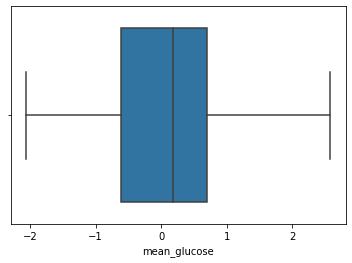

In [29]:
sns.boxplot(x=train_data['mean_glucose'])

<AxesSubplot:xlabel='age'>

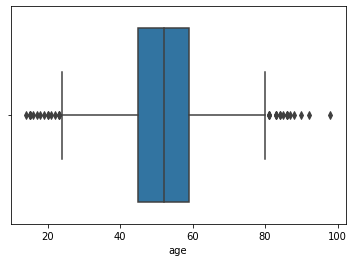

In [30]:
sns.boxplot(x=valid_data['age'])

Na testovacích dátach spustíme už len funkciu transform (model je natrénovaný na trénovacích dátach).

In [31]:
valid_data = pipeline.transform(valid_data)

In [32]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1310
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1310 non-null   float64
 1   sex_0             1310 non-null   int64  
 2   sex_1             1310 non-null   int64  
 3   race_0            1310 non-null   int64  
 4   race_1            1310 non-null   int64  
 5   race_2            1310 non-null   int64  
 6   race_3            1310 non-null   int64  
 7   marital_status_0  1310 non-null   int64  
 8   marital_status_1  1310 non-null   int64  
 9   marital_status_2  1310 non-null   int64  
 10  marital_status_3  1310 non-null   int64  
 11  occupation_0      1310 non-null   int64  
 12  occupation_1      1310 non-null   int64  
 13  occupation_2      1310 non-null   int64  
 14  occupation_3      1310 non-null   int64  
 15  occupation_4      1310 non-null   int64  
 16  pregnant          1310 non-null   float64


In [33]:
valid_data.isnull().sum()

age                 0
sex_0               0
sex_1               0
race_0              0
race_1              0
race_2              0
race_3              0
marital_status_0    0
marital_status_1    0
marital_status_2    0
marital_status_3    0
occupation_0        0
occupation_1        0
occupation_2        0
occupation_3        0
occupation_4        0
pregnant            0
education_num       0
relationship_0      0
relationship_1      0
relationship_2      0
relationship_3      0
skewness_glucose    0
mean_glucose        0
capital_gain        0
kurtosis_glucose    0
fnlwgt              0
diabetes            2
std_glucose         0
income              0
native_country_0    0
native_country_1    0
native_country_2    0
native_country_3    0
native_country_4    0
native_country_5    0
native_country_6    0
hours_per_week      0
capital_loss        0
workclass_0         0
workclass_1         0
workclass_2         0
workclass_3         0
mean_oxygen         0
std_oxygen          0
kurtosis_o

In [34]:
valid_data

,age,sex_0,sex_1,race_0,race_1,race_2,race_3,marital_status_0,marital_status_1,marital_status_2,marital_status_3,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,pregnant,education_num,relationship_0,relationship_1,relationship_2,relationship_3,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,income,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,hours_per_week,capital_loss,workclass_0,workclass_1,workclass_2,workclass_3,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,-1.249545,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,9,0,0,1,1,-0.657531,1.259920,-0.305135,-0.902141,-1.780818,0.0,-0.064353,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,-0.592826,-0.697428,0.663412,0.721436
1,0.339012,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0.0,9,0,0,0,1,1.584854,-2.014912,-0.305135,1.712254,0.596722,1.0,-0.067117,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,1.687189,1.376349,-1.655379,-1.643279
2,-1.409975,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0.0,14,0,0,1,1,-0.292021,-0.035408,-0.305135,-0.220169,0.987822,0.0,-0.061203,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,1,0,0,-0.672567,-0.713467,0.706484,0.717238
3,0.512151,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0.0,9,0,0,1,1,-0.030044,0.542429,-0.305135,-0.340638,1.351955,0.0,-0.062279,1,0,0,0,0,0,0,1,-0.199558,-0.22154,0,0,0,1,-0.963002,-1.365005,0.967961,1.155843
4,-0.342953,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0.0,11,0,1,0,1,-0.204005,0.056371,-0.305135,-0.008356,0.780305,0.0,-0.063645,1,0,0,0,0,0,0,1,-2.756717,-0.22154,0,0,0,1,1.716872,1.497138,-1.853200,-1.707249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0.252826,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.0,9,0,0,1,0,-1.476272,0.831345,3.277309,-0.722158,0.150600,0.0,-0.044644,2,0,0,0,0,0,0,1,0.739415,-0.22154,0,0,0,1,-0.654321,-0.929573,0.552375,0.657175
1306,0.512151,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0.0,10,0,0,0,1,0.565262,-0.769179,-0.305135,0.436747,0.221514,0.0,-0.069229,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,-0.632079,-0.981503,0.506242,0.650463
1307,-0.004154,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0.0,9,0,0,1,0,1.647987,-1.784113,-0.305135,1.770213,1.157925,1.0,-0.044644,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,1.703557,1.612762,-1.775388,-1.846240
1309,0.166900,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0.0,10,0,0,1,0,-0.503725,0.185977,-0.305135,-0.472686,-0.502482,0.0,-0.062611,2,0,0,0,0,0,0,1,0.583384,-0.22154,0,1,1,0,-0.363878,-0.446093,0.141970,0.181312


<AxesSubplot:xlabel='mean_glucose'>

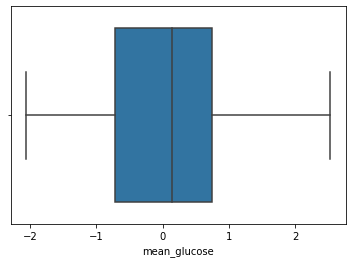

In [35]:
sns.boxplot(x=valid_data['mean_glucose'])

<AxesSubplot:xlabel='age'>

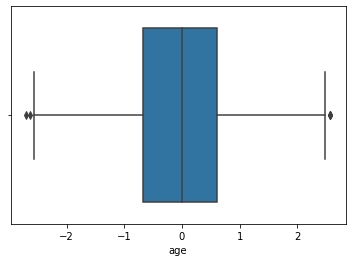

In [36]:
sns.boxplot(x=valid_data['age'])

### Doplnenie predspracovania dát

Predspracovanie trénovacieho aj validačného datasetu prebehlo úspešne. Zistili sme však, že v testovacom datasete sa nachádzajú dva záznamy, ktoré majú prázdnu hodnotu atribútu "diabetes". Rozhodli sme sa, že tieto záznamy odstránime.

In [37]:
valid_data = valid_data.dropna()

### Natrénovanie a vyhodnotenie klasifikátora s využitím rozhodovacích stromov 

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
cls = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
train_data_without_cols = train_data.copy()
train_data_without_cols = train_data_without_cols.drop(['diabetes'], axis=1)

valid_data_without_cols = valid_data.copy()
valid_data_without_cols = valid_data_without_cols.drop(['diabetes'], axis=1)

In [40]:
X = train_data_without_cols.loc[:]
y = train_data.loc[:, 'diabetes']

cls.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
# valid_data_without_cols['Predicted'] = cls.predict(valid_data_without_cols.loc[:])
predicted = cls.predict(valid_data_without_cols.loc[:])

### Vyhodnotenie natrénovaného rozhodovacieho stromu pomocou metrík accuracy, precision a recall

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# accuracy_score(valid_data['diabetes'], valid_data_without_cols['Predicted'])
accuracy_score(valid_data['diabetes'], predicted)

0.9495412844036697

In [43]:
# recall_score(valid_data['diabetes'], valid_data_without_cols['Predicted'])
recall_score(valid_data['diabetes'], predicted)

0.9075144508670521

In [44]:
# precision_score(valid_data['diabetes'], valid_data_without_cols['Predicted'])
precision_score(valid_data['diabetes'], predicted)

0.9022988505747126

 ### Vizualizácia natrénovaných pravidiel (stromu)

[Text(754.21728515625, 1058.5894736842106, 'X[25] <= 0.5\nentropy = 0.82\nsamples = 3926\nvalue = [2922, 1004]'),
 Text(351.7470703125, 1001.3684210526317, 'X[25] <= -0.119\nentropy = 0.266\nsamples = 3020\nvalue = [2883, 137]'),
 Text(81.375, 944.1473684210526, 'X[43] <= -0.593\nentropy = 0.099\nsamples = 2102\nvalue = [2075, 27]'),
 Text(23.25, 886.9263157894737, 'X[0] <= 2.34\nentropy = 0.013\nsamples = 864\nvalue = [863, 1]'),
 Text(11.625, 829.7052631578947, 'entropy = 0.0\nsamples = 863\nvalue = [863, 0]'),
 Text(34.875, 829.7052631578947, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(139.5, 886.9263157894737, 'X[25] <= -0.45\nentropy = 0.147\nsamples = 1238\nvalue = [1212, 26]'),
 Text(58.125, 829.7052631578947, 'X[44] <= 0.071\nentropy = 0.056\nsamples = 785\nvalue = [780, 5]'),
 Text(46.5, 772.4842105263158, 'entropy = 0.0\nsamples = 462\nvalue = [462, 0]'),
 Text(69.75, 772.4842105263158, 'X[45] <= 0.042\nentropy = 0.115\nsamples = 323\nvalue = [318, 5]'),
 Text(46.5, 

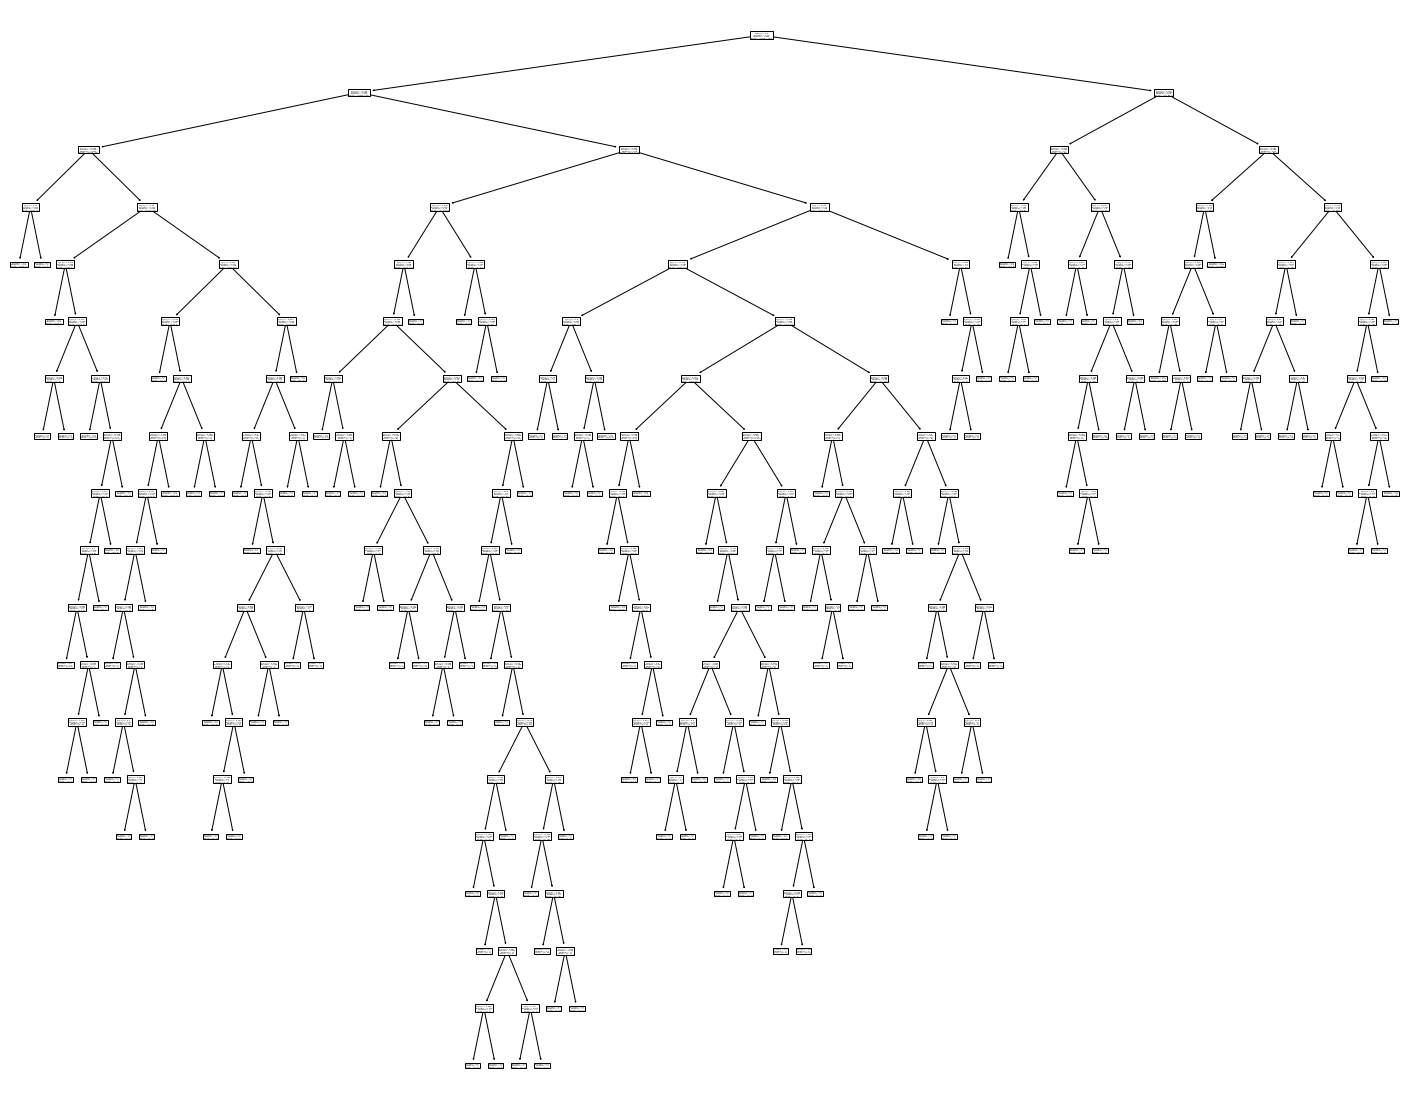

In [45]:
plt.rcParams['figure.figsize'] = 25, 20
tree.plot_tree(cls)

In [46]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(cls, 
                               out_file=None,
                               feature_names=train_data_without_cols.columns,
                               class_names=['no', 'yes'],
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH